# 8 Step Of Machine Learning
* Data Gathering
* Data Pre-processing
* Feature Engeneering
* Choosing Model
* Traing Model
* Test MOdel/Model Evaluation
* Parameter Tuning
* Prediction

# Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Pre-processing

In [5]:
data.drop(columns=["MODELYEAR","MAKE","MODEL","VEHICLECLASS", "FUELCONSUMPTION_COMB_MPG"], inplace=True)
data.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2.4,4,M6,Z,11.2,7.7,9.6,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,244


# Feature Engineering

In [6]:
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]
X.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


# Spliting data Training and Test Set

In [7]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)  

In [8]:
ytrain.shape
Xtrain.shape

(853, 1)

In [9]:
Xtest.shape
ytest.shape

(214, 1)

# Choosing Model

In [10]:
from sklearn.linear_model import LinearRegression

# Model Initialize

In [11]:
model = LinearRegression()
model

LinearRegression()

# Training Model

In [12]:
model.fit(Xtrain.values, ytrain.values)

LinearRegression()

In [13]:
## Theta 0
theta0 = model.intercept_

## Theta 1
theta1 = model.coef_


# Testing Model

In [14]:
yhat = model.predict(Xtest.values)

# Error Validation

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
mean_squared_error(yhat, ytest)
100 -mean_absolute_percentage_error(yhat, ytest) *100

90.05475159725387

In [16]:
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]

# KFold Cross Validation

In [17]:
from sklearn.model_selection import KFold

'''low = 0
up = data.shape[0]
folds = KFold(n_splits = 5)
fold = 0
x,y = 0,0
xt,yt = 0
for train, test in folds.split(range(low, up)):
    
    # Training Data
    x = X.iloc[train]
    y = Y.iloc[train]
    
    # Training Data
    xt = X.iloc[test]
    yt = Y.iloc[test]

    # Model Init
    model = LinearRegression()

    # Training Model
    model.fit(x,y)

    # Testing Model
    yhat = model.predict(xt.values)
    fold += 1

    # Evaluation
    print(f"fold{fold}")
    print("======================")
    print("MAE: ",100 - mean_absolute_percentage_error(yhat, yt)*100)
    print("MSE: " ,mean_squared_error(yhat, yt))
    print("==========================")'''

'low = 0\nup = data.shape[0]\nfolds = KFold(n_splits = 5)\nfold = 0\nx,y = 0,0\nxt,yt = 0\nfor train, test in folds.split(range(low, up)):\n    \n    # Training Data\n    x = X.iloc[train]\n    y = Y.iloc[train]\n    \n    # Training Data\n    xt = X.iloc[test]\n    yt = Y.iloc[test]\n\n    # Model Init\n    model = LinearRegression()\n\n    # Training Model\n    model.fit(x,y)\n\n    # Testing Model\n    yhat = model.predict(xt.values)\n    fold += 1\n\n    # Evaluation\n    print(f"fold{fold}")\n    print("======================")\n    print("MAE: ",100 - mean_absolute_percentage_error(yhat, yt)*100)\n    print("MSE: " ,mean_squared_error(yhat, yt))\n    print("==========================")'

# Analyssis for Linear Regression

In [18]:
line = np.linspace(1,10, 1000).reshape(-1,1)
line

array([[ 1.        ],
       [ 1.00900901],
       [ 1.01801802],
       [ 1.02702703],
       [ 1.03603604],
       [ 1.04504505],
       [ 1.05405405],
       [ 1.06306306],
       [ 1.07207207],
       [ 1.08108108],
       [ 1.09009009],
       [ 1.0990991 ],
       [ 1.10810811],
       [ 1.11711712],
       [ 1.12612613],
       [ 1.13513514],
       [ 1.14414414],
       [ 1.15315315],
       [ 1.16216216],
       [ 1.17117117],
       [ 1.18018018],
       [ 1.18918919],
       [ 1.1981982 ],
       [ 1.20720721],
       [ 1.21621622],
       [ 1.22522523],
       [ 1.23423423],
       [ 1.24324324],
       [ 1.25225225],
       [ 1.26126126],
       [ 1.27027027],
       [ 1.27927928],
       [ 1.28828829],
       [ 1.2972973 ],
       [ 1.30630631],
       [ 1.31531532],
       [ 1.32432432],
       [ 1.33333333],
       [ 1.34234234],
       [ 1.35135135],
       [ 1.36036036],
       [ 1.36936937],
       [ 1.37837838],
       [ 1.38738739],
       [ 1.3963964 ],
       [ 1

Text(0.5, 1.0, 'Linear Regression')

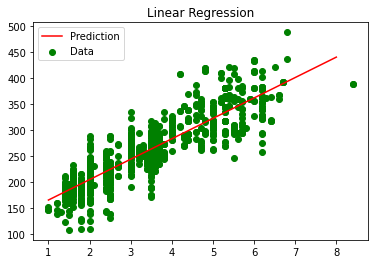

In [19]:
line = np.linspace(1,8, 1000).reshape(-1,1)

## Create Ploting area
fig, axes = plt.subplots(1,1)

axes.scatter(X.values,Y, c="green", label="Data")
axes.plot(line, model.predict(line), c="red", label="Prediction")
axes.legend()
axes.set_title("Linear Regression")

In [20]:
Xtest.shape
ytest.shape

for x in zip([3,4,5], ["W","X","Y"]):
    print(x)

(3, 'W')
(4, 'X')
(5, 'Y')


fold1
MAE:  91.80543288444645
MSE:  880.0197643876039
fold2
MAE:  90.81727060148889
MSE:  1055.0371580399533
fold3
MAE:  90.24724563788862
MSE:  1075.619669823353
fold4
MAE:  90.02070056997893
MSE:  1023.274234638785
fold5
MAE:  91.40216545990542
MSE:  747.3833993410918


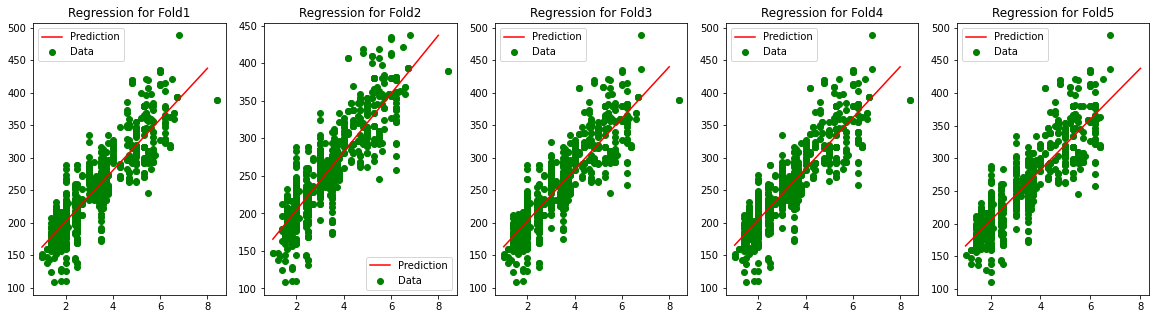

In [21]:
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]

line = np.linspace(1,8, 1000).reshape(-1,1)

## Create Ploting area
fig, axes = plt.subplots(1,5, figsize=(20,5))

low = 0
up = data.shape[0]
folds = KFold(n_splits = 5)
fold = 0

for splits, ax in zip(folds.split(range(low, up)), axes):
    
    # Training Data
    x = X.iloc[splits[0]]
    y = Y.iloc[splits[0]]
    
    # Training Data
    xt = X.iloc[splits[1]]
    yt = Y.iloc[splits[1]]

    # Model Init
    model = LinearRegression()

    # Training Model
    model.fit(x,y)

    # Testing Model
    yhat = model.predict(xt.values)
    fold += 1

    # Evaluation
    print(f"fold{fold}")
    print("======================")
    print("MAE: ",100 - mean_absolute_percentage_error(yhat, yt)*100)
    print("MSE: " ,mean_squared_error(yhat, yt))
    print("==========================")

    ax.scatter(x.values,y, c="green", label="Data")
    ax.plot(line, model.predict(line), c="red", label="Prediction")
    ax.legend()
    ax.set_title(f"Regression for Fold{fold}")

fig.savefig("linear.png")

# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
ks = [3,4,5,6,7,8,9]
for k in ks:
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X, Y)
    yhat = knn_model.predict(Xtest)
    
    print(f"======================k = {k}================")
    print("MAE: ",100 - mean_absolute_percentage_error(yhat, ytest)*100)
    print("MSE: " ,mean_squared_error(yhat, ytest))
    print("r2_score : ", r2_score(yhat, ytest))
    print("==========================")

======================k = 3================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 4================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 5================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 6================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 7================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 8================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 9================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392


# Analyssis for KNN Regression

======================k = 3================
MAE:  89.80037264214295
MSE:  1163.761682242991
r2_score :  0.6838525592900392
======================k = 5================
MAE:  89.75413551076093
MSE:  1101.5072897196262
r2_score :  0.7031581669242177
======================k = 7================
MAE:  89.91544857575565
MSE:  1056.9403013541864
r2_score :  0.7011296860937497
======================k = 9================
MAE:  89.74944224784318
MSE:  1068.3284296757818
r2_score :  0.6869464827186647


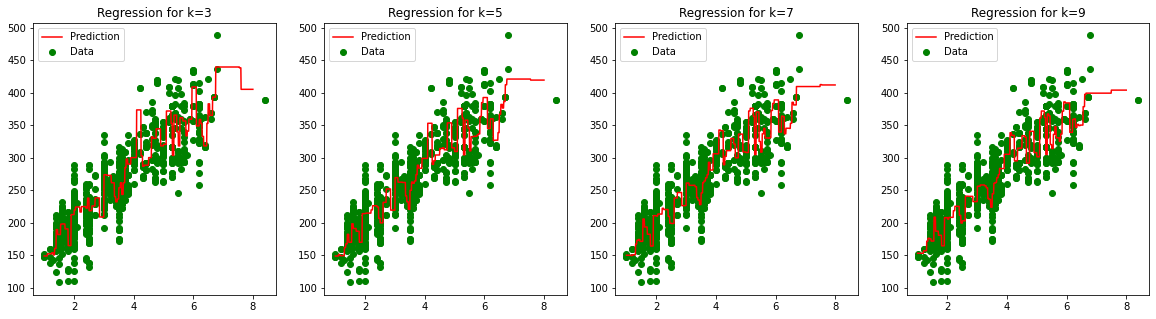

In [23]:
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]

line = np.linspace(1,8, 800).reshape(-1,1)

## Create Ploting area
fig, axes = plt.subplots(1,4, figsize=(20,5))

ks = [3,5,7,9]
for k, ax in zip(ks, axes):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X.values, Y.values)
    yhat = knn_model.predict(Xtest)
    
    ax.scatter(X.values,Y.values, c="green", label="Data")
    ax.plot(line, knn_model.predict(line), c="red", label="Prediction")
    ax.legend()
    ax.set_title(f"Regression for k={k}")
    
    print(f"======================k = {k}================")
    print("MAE: ",100 - mean_absolute_percentage_error(yhat, ytest)*100)
    print("MSE: " ,mean_squared_error(yhat, ytest))
    print("r2_score : ", r2_score(yhat, ytest))
    print("==========================")

fig.savefig("KNN.png")

# Analysis for Decision Tree

## Decision Tree Model

In [24]:
'''from sklearn import tree
dt_model = tree.DecisionTreeRegressor()
dt_model.fit(X,Y)criterion="mse",max_depth=3, max_leaf_nodes=int(np.sqrt(np.array([860]))))

yhat = dt_model.predict(Xtest)
print("MAE: ",100 - mean_absolute_percentage_error(yhat, ytest)*100)
print("MSE: " ,mean_squared_error(yhat, ytest))
print("R2 Scoore: ", r2_score(yhat, ytest))'''

'from sklearn import tree\ndt_model = tree.DecisionTreeRegressor()\ndt_model.fit(X,Y)criterion="mse",max_depth=3, max_leaf_nodes=int(np.sqrt(np.array([860]))))\n\nyhat = dt_model.predict(Xtest)\nprint("MAE: ",100 - mean_absolute_percentage_error(yhat, ytest)*100)\nprint("MSE: " ,mean_squared_error(yhat, ytest))\nprint("R2 Scoore: ", r2_score(yhat, ytest))'

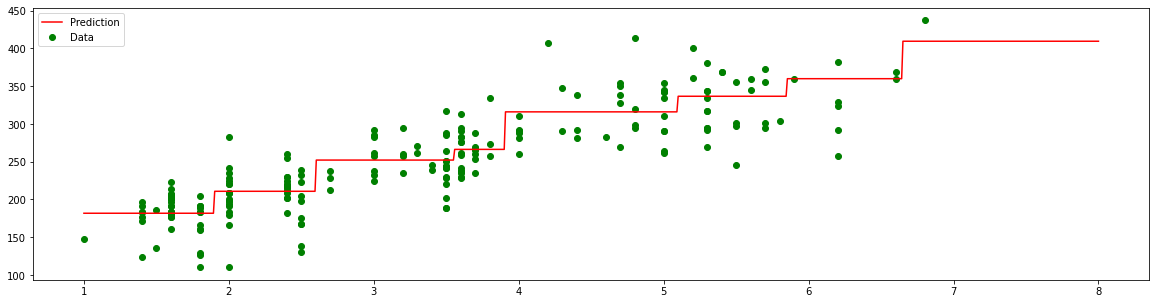

In [25]:
# Analysis for Decision Tree
from sklearn import tree
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]

line = np.linspace(1,8, 800).reshape(-1,1)

## Create Ploting area
fig, axes = plt.subplots(1,1, figsize=(20,5))

dt_model = tree.DecisionTreeRegressor(criterion="mse", max_depth=3, max_leaf_nodes=int(np.sqrt(np.array([860]))))
dt_model.fit(X,Y)

yhat = dt_model.predict(Xtest[["ENGINESIZE"]])

axes.scatter(Xtest[["ENGINESIZE"]],ytest, c="green", label="Data")
axes.plot(line, dt_model.predict(line), c="red", label="Prediction")
axes.legend()

fig.savefig("DecisionTree.png")

# Analysis for Random Forest

In [26]:
'''from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

## Data
xtrain = Xtrain[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
ytrain = ytrain[["CO2EMISSIONS"]].values.ravel()

xtest = Xtest[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
ytest = ytest[["CO2EMISSIONS"]].values.ravel()

## Initiallization Model
rf_model = RandomForestRegressor()

## Train Model
rf_model.fit(xtrain, ytrain)

## Test Model
yhat = rf_model.predict(xtest)

## Evaluation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

print("MSE: ", mean_squared_error(yhat, ytest))
print("R2: ", r2_score(yhat, ytest))
rf_model.n_estimators

print("Training Accuracy")
print(rf_model.score(xtrain, ytrain))
print("Testing Accuracy")
rf_model.score(xtest, ytest)'''

'from sklearn import tree\nfrom sklearn.ensemble import RandomForestRegressor\n\n## Data\nxtrain = Xtrain[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]\nytrain = ytrain[["CO2EMISSIONS"]].values.ravel()\n\nxtest = Xtest[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]\nytest = ytest[["CO2EMISSIONS"]].values.ravel()\n\n## Initiallization Model\nrf_model = RandomForestRegressor()\n\n## Train Model\nrf_model.fit(xtrain, ytrain)\n\n## Test Model\nyhat = rf_model.predict(xtest)\n\n## Evaluation\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score\n\nprint("MSE: ", mean_squared_error(yhat, ytest))\nprint("R2: ", r2_score(yhat, ytest))\nrf_model.n_estimators\n\nprint("Training Accuracy")\nprint(rf_model.score(xtrain, ytrain))\nprint("Testing Accuracy")\nrf_model.score(xtest, ytest)'

C:\Users\HASINU~1\AppData\Local\Temp/ipykernel_9284/4175547868.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X,Y)


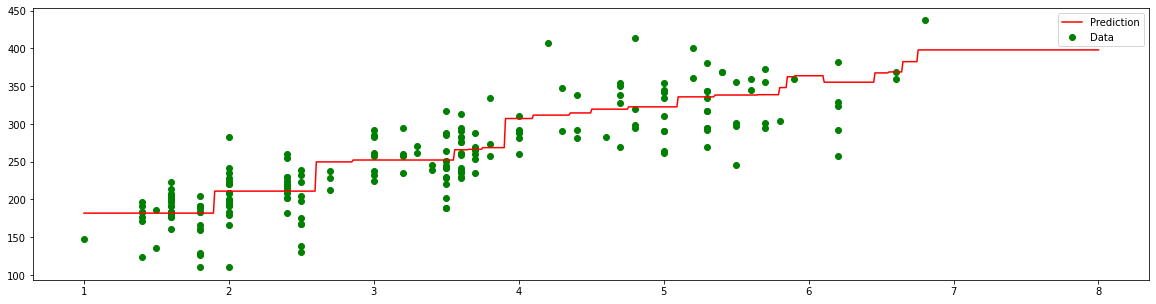

In [27]:
from sklearn.ensemble import RandomForestRegressor
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]

line = np.linspace(1,8, 800).reshape(-1,1)

## Create Ploting area

fig, axes = plt.subplots(1,1, figsize=(20,5))

rf_model = RandomForestRegressor(criterion="mse", max_depth=3, max_leaf_nodes=int(np.sqrt(np.array([860]))))
rf_model.fit(X,Y)

axes.scatter(Xtest[["ENGINESIZE"]],ytest, c="green", label="Data")
axes.plot(line, rf_model.predict(line), c="red", label="Prediction")
axes.legend()

fig.savefig("RandomForest.png")